# Machine Learning - Classification

## Setup and Loading Packages

In [1]:
# Import relevant packages
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

## Predicting Market Directions with Logistic Regression

We compiled a list of features for building our linear model for predicting the performance of a the Russell 2000 ETF (Ticker: IWM). These features include ETFs considering Environmental, Social and Governance (ESG) factorsm along with some economic indicatiors.

<b>Technology Breakthrough:</b>
<ul>
  <li>IBLC</li>
  <li>IRBO</li>
  <li>IHAK</li>
</ul>
<b>Social Change:</b>
<ul>
  <li>IDNA</li>
  <li>IWFH</li>
  <li>BMED</li>
</ul>
<b>Urbanization:</b>
<ul>
  <li>IFRA</li>
  <li>IGF</li>
  <li>EMIF</li>
</ul>
<b>Climate Change:</b>
<ul>
  <li>ICLN</li>
  <li>IDRV</li>
  <li>IVEG</li>
</ul>
<b>Global Wealth:</b>
<ul>
  <li>CNYA</li>
</ul>
<b>Economic Indicators:</b>
<ul>
  <li>volatility_index</li>
  <li>option_adjusted_spread</li>
  <li>inflation_rate</li>
</ul>


<p style="color:red;"> After processing the data (e.g., removing outliers, missing values, unimportant features), we end up having just 2 features in our dataset - BMED and IVEG log returns. So let's take the shortcut and pull in data for just these two assets.</p>

In [2]:
ETF_TICKERS = ['BMED', 'IVEG', 'IWM'] # Enter the ETF ticker symbols here
START_DATE = '2022-06-01' # ETF data start date
END_DATE = '2023-06-01' # ETF data end date

In [3]:
etfPxList = yf.download(ETF_TICKERS, START_DATE, END_DATE)['Adj Close'] # Retrieve ETF adjusted close price data from yahoo finance
DATA = np.log(etfPxList).diff().dropna() # Calculate log returns and drop null values

[*********************100%***********************]  14 of 14 completed


### Transformation into a Classification Problem

We can also transform this into a classification problem. All we have to do is just to convert the IWM log returns into binary values, 0 represents a day with negative return (downward direction) and 1 represents a day with positive return (upward direction). So the problem now becomes using the BMED and IVEG daily log return values to predict IWM daily log return directions.

In [284]:
DATA.IWM = (DATA.IWM > 0).astype(int) # Convert IWM log returns into binary values 1's and 0's in original data
DATA.head() # View the transformed data

,BMED,IVEG,IWM
2022-06-02,1.519343,1.553735,1
2022-06-03,-0.709552,-0.918115,0
2022-06-06,-0.212229,0.228417,1
2022-06-07,1.059938,0.144687,1
2022-06-08,-0.339705,-1.122713,0


### Fitting Logistic Regression Model

In [290]:
logistic_model = LogisticRegression() # Declare logistic regression model

RESPONSE = 'IWM' # Response variable
FEATURES = ['BMED', 'IVEG'] # Explanatory variable
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(DATA.loc[:, FEATURES], DATA.loc[:, RESPONSE], test_size=0.2, random_state=0)


logistic_model = logistic_model.fit(X_train, y_train) # Fit logistic regression model
lr_probs = logistic_model.predict_proba(X_test) # Calculate the probabilities of achieving each class in the testing data
y_test_pred_logistic = logistic_model.predict(X_test) # Predict the class labels in the testing data

Let's produce the confusion matrix.

Text(0.5, 1.0, 'Confusion Matrix')

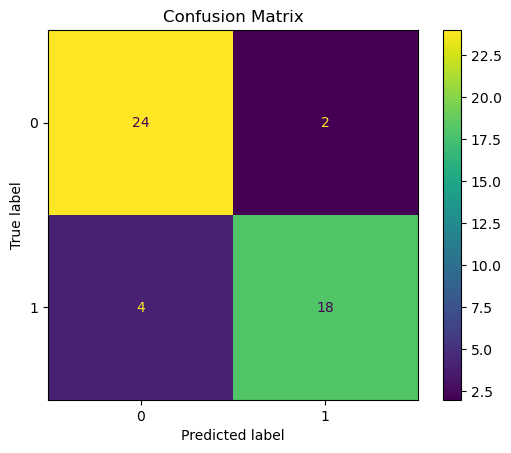

In [298]:
cm_logistic = confusion_matrix(y_test, y_test_pred_logistic, labels=logistic_model.classes_) # Compute counts for the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=logistic_model.classes_).plot() # Display counts for the confusion matrix
plt.title("Confusion Matrix") # Label title

Let's compute both training and testing accuracies.

In [300]:
print('training accuracy score:', logistic_model.score(X_train,y_train)) # Print training accuracy score
print('testing accuracy score:', logistic_model.score(X_test,y_test)) # Print testing accuracy score

training accuracy score: 0.9157894736842105
testing accuracy score: 0.875
